In [1]:
import gym
import itertools
import matplotlib.style
import numpy as np
import sys
from helper import plot_rewards, plot_iters
from collections import defaultdict, namedtuple
matplotlib.style.use('dark_background')
np.random.seed(23)

In [2]:
env = gym.make('Taxi-v3')

In [3]:
def greedyEpsilon(Q, eps, num_a):
    def nest(s):
        probA = np.ones(num_a) * eps / num_a
        bestA = np.argmax(Q[s])
        probA[bestA] += (1.0 - eps)
        return probA
    return nest

In [4]:
EpisodeStats = namedtuple("Stats",["iters", "rewards"])
def qLearning(env, episodes, discount = 1.0, alpha = 0.6, eps = 0.1):

    Q = defaultdict(lambda: np.zeros(env.nA))
    
    stats = EpisodeStats(iters = np.zeros(episodes),rewards = np.zeros(episodes))    
    policy = greedyEpsilon(Q, eps, env.nA)
    for episode in range(episodes):
        r=0
        s = env.reset()
        for t in itertools.count():
            probA = policy(s)
            a = np.random.choice(np.arange(len(probA)),p = probA)
            s_prime, reward, done, _ = env.step(a)
            r += reward    
            stats.iters[episode] = t
            best_next_a = np.argmax(Q[s_prime])    
            td_target = reward + discount * Q[s_prime][best_next_a]
            td_delta = td_target - Q[s][a]
            Q[s][a] += alpha * td_delta
     
            if done:
                break
                   
            s = s_prime
        stats.rewards[episode] = r
    return Q, stats

In [5]:
Q, stats = qLearning(env, 10000)

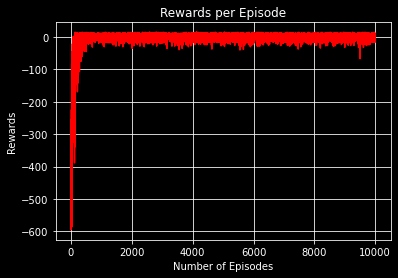

In [6]:
plot_rewards(stats.rewards, 'Rewards per Episode','Rewards')

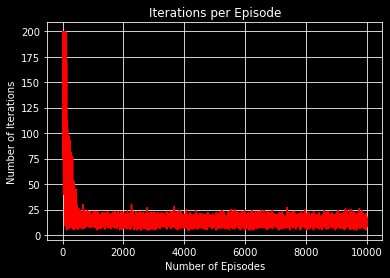

In [7]:
plot_iters(stats.iters, 'Iterations per Episode', 'Number of Iterations')